# Réduction de dimmension 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Pour éviter d'avoir les messages warning
import warnings
warnings.filterwarnings('ignore')


In [5]:
df = pd.read_csv('Breast_Cancer_Clean.csv', sep=';')

df.head()


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Affichage de la matrice de corrélation des différentes variables de df

<Axes: >

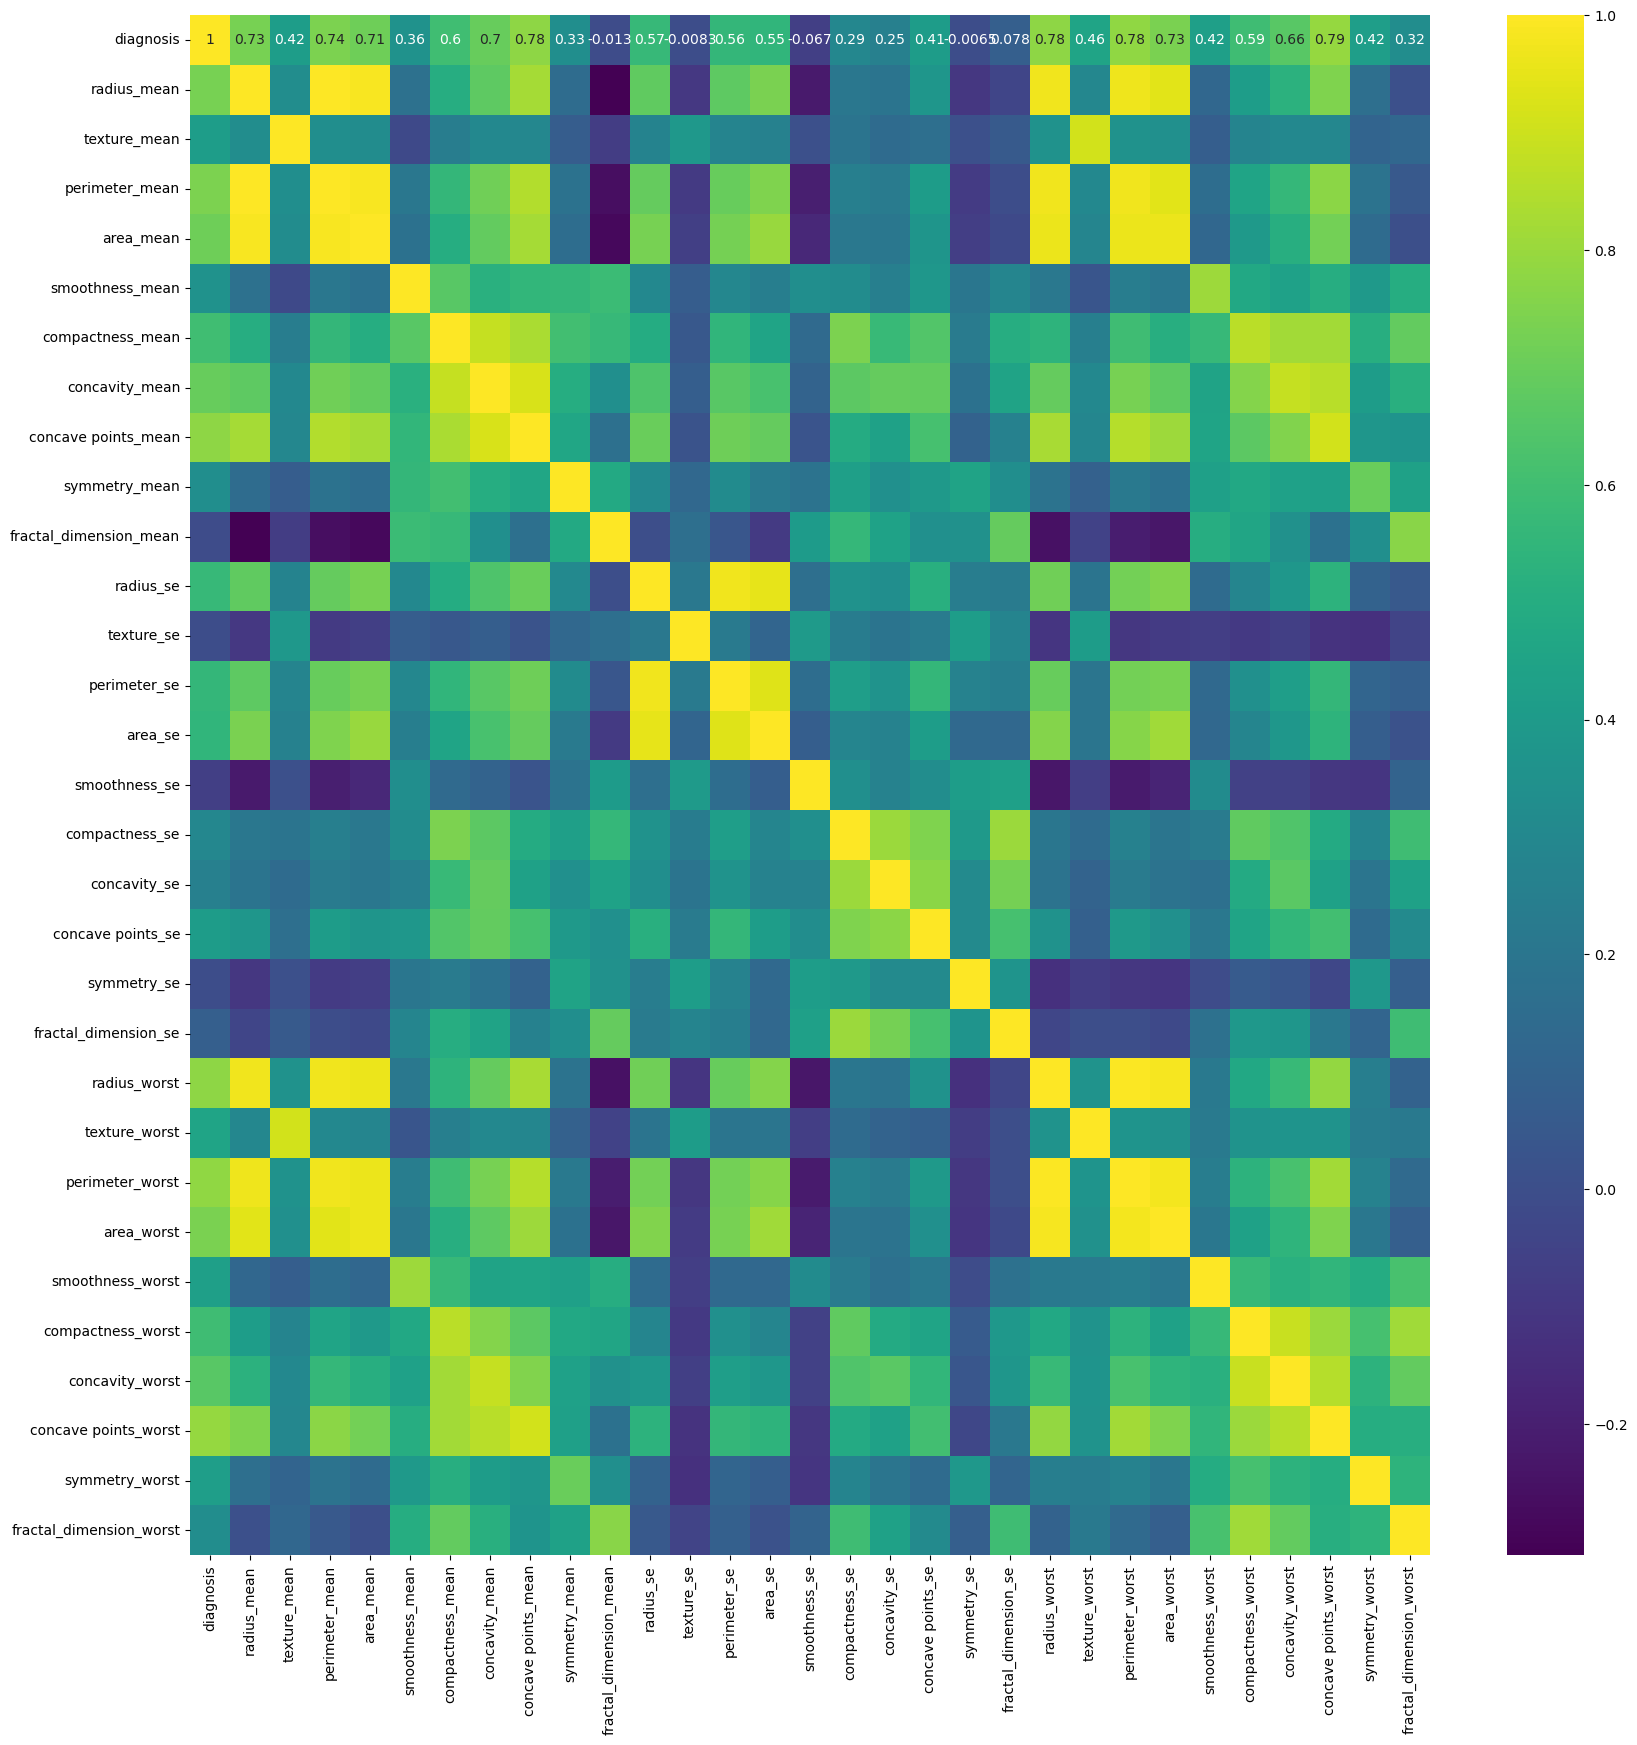

In [6]:
plt.figure(figsize=(20,20)) #Taille de la figure

sns.heatmap(df.corr(), annot=True, cmap='viridis')

La variable la plus corrélée à la variable cible est 'concave points_worst'

In [7]:
# Import classe StandardScaler du module sklearn.preprocessing.
from sklearn.preprocessing import StandardScaler

# Création sc, une instance de StandardScaler.
sc = StandardScaler()

#  Normalisation df à l'aide de la méthode fit_transform().
Z = sc.fit_transform(df)  
Z

array([[ 1.29767572,  1.09706398, -2.07333501, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.29767572,  1.82982061, -0.35363241, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.29767572,  1.57988811,  0.45618695, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 1.29767572,  0.70228425,  2.0455738 , ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.29767572,  1.83834103,  2.33645719, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-0.77060855, -1.80840125,  1.22179204, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [8]:
# Import foction PCA
from sklearn.decomposition import PCA

#Création de pca instance de PCA
pca = PCA()

# Contient les coordonnées de l'ACP sur les lignes.
Coord = pca.fit_transform(Z)


In [9]:
# Affichage la variance expliquée pour chaque composante grâce à l’attribut explained_variance_ de PCA
print('Part de variance expliquée :', pca.explained_variance_)

Part de variance expliquée : [1.39422741e+01 5.73643378e+00 2.85186154e+00 2.00188139e+00
 1.66199949e+00 1.20963379e+00 6.85924646e-01 4.85709057e-01
 4.17628800e-01 3.51511408e-01 3.05392113e-01 2.91498144e-01
 2.61469947e-01 2.12649275e-01 1.48837762e-01 8.83177777e-02
 8.00007715e-02 5.91392660e-02 5.15525101e-02 4.83008359e-02
 3.07603392e-02 2.95786345e-02 2.73928094e-02 2.43263453e-02
 1.75831161e-02 1.55005796e-02 8.07032705e-03 6.88182652e-03
 1.59126388e-03 7.42984526e-04 1.32868212e-04]


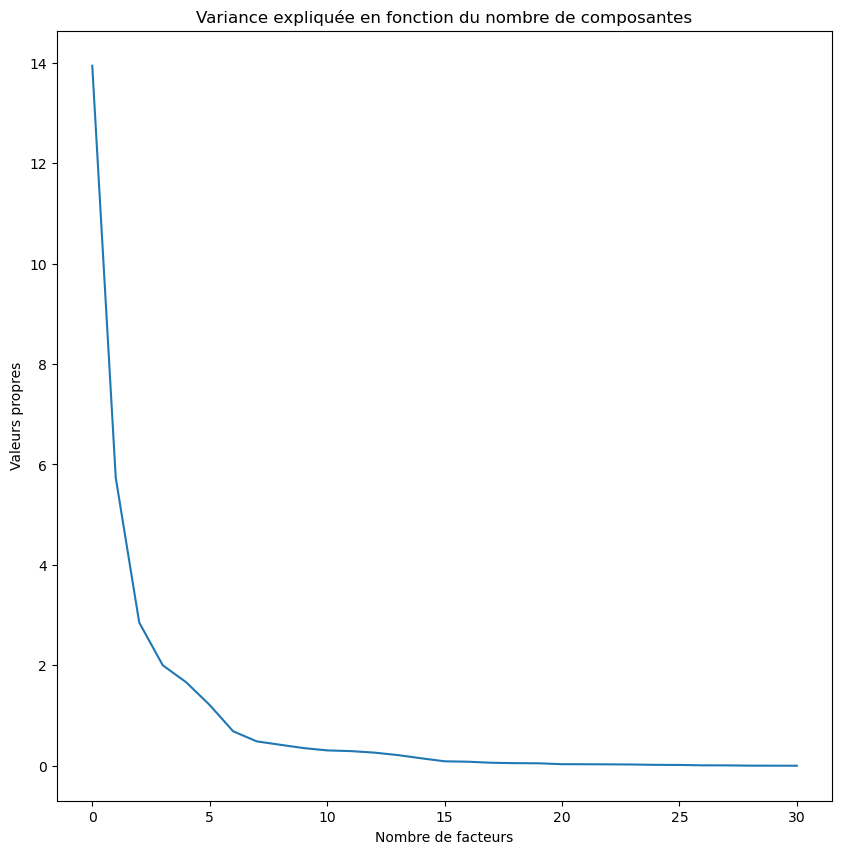

In [13]:

n_components = len(pca.explained_variance_)

plt.figure(figsize=(10, 10))
plt.plot(range(n_components), pca.explained_variance_)
plt.xlabel('Nombre de facteurs')
plt.ylabel('Valeurs propres')
plt.title('Variance expliquée en fonction du nombre de composantes')
plt.show()


In [14]:
# ratio de la variance expliquée grâce à l’attribut explained_variance_ration_ de PCA pour chaque composante
print('Les ratio sont :', pca.explained_variance_ratio_)

Les ratio sont : [4.48960353e-01 1.84721038e-01 9.18338543e-02 6.44633272e-02
 5.35186638e-02 3.89518676e-02 2.20877147e-02 1.56404980e-02
 1.34482203e-02 1.13191496e-02 9.83404501e-03 9.38664017e-03
 8.41969101e-03 6.84759840e-03 4.79278013e-03 2.84395361e-03
 2.57613460e-03 1.90436550e-03 1.66006155e-03 1.55535318e-03
 9.90525123e-04 9.52472611e-04 8.82086046e-04 7.83341693e-04
 5.66200463e-04 4.99139931e-04 2.59875603e-04 2.21604256e-04
 5.12408800e-05 2.39251211e-05 4.27853873e-06]


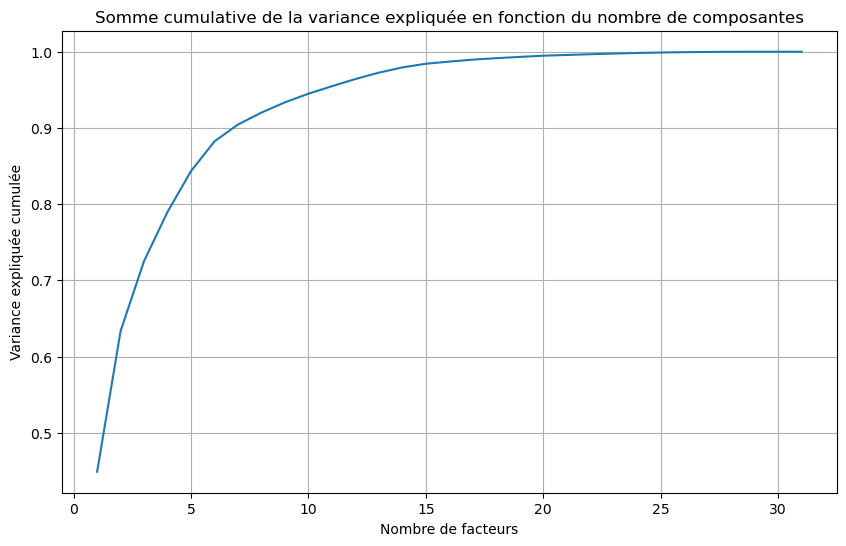

In [16]:
n_components = len(pca.explained_variance_ratio_)

# Graphe de la somme cumulative de la variance expliquée
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, n_components + 1), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Nombre de facteurs')
plt.ylabel('Variance expliquée cumulée')
plt.title('Somme cumulative de la variance expliquée en fonction du nombre de composantes')
plt.grid(True)
plt.show()

([<matplotlib.patches.Wedge at 0x19539d96c50>,
 [Text(0.1756254795836167, 1.0858893548244337, 'PC1'),
  Text(-1.063134448989958, -0.2823918259631796, 'PC2'),
  Text(-0.47086767064519014, -0.9941245579610096, 'PC3'),
  Text(0.05352170094767704, -1.0986971500498524, 'PC4'),
  Text(0.4478600956463998, -1.0046996241303159, 'PC5'),
  Text(0.7168764914639447, -0.8343189414045117, 'PC6'),
  Text(1.0258394625277951, -0.3970559118319292, 'Autres')],
 [Text(0.09579571613651819, 0.592303284449691, '44.896%'),
  Text(-0.5798915176308861, -0.1540319050708252, '18.472%'),
  Text(-0.25683691126101277, -0.5422497588878233, '9.183%'),
  Text(0.02919365506236929, -0.5992893545726466, '6.446%'),
  Text(0.24428732489803623, -0.5480179767983541, '5.352%'),
  Text(0.39102354079851526, -0.4550830589479154, '3.895%'),
  Text(0.5595487977424336, -0.216575951908325, '11.755%')])

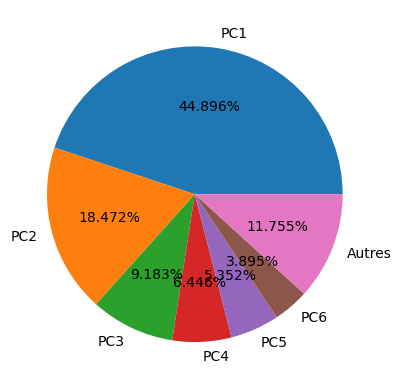

In [17]:
# Camembert de la répartition de la part de variance expliquée par chaque axe.
L1 = list(pca.explained_variance_ratio_[0:6])
L1.append(sum(pca.explained_variance_ratio_[6:31]))

plt.pie(L1, labels=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'Autres'], 
        autopct='%1.3f%%')

Affichage des coefrf de corrélation de chaque variable ACP sur les deux premièrs axes

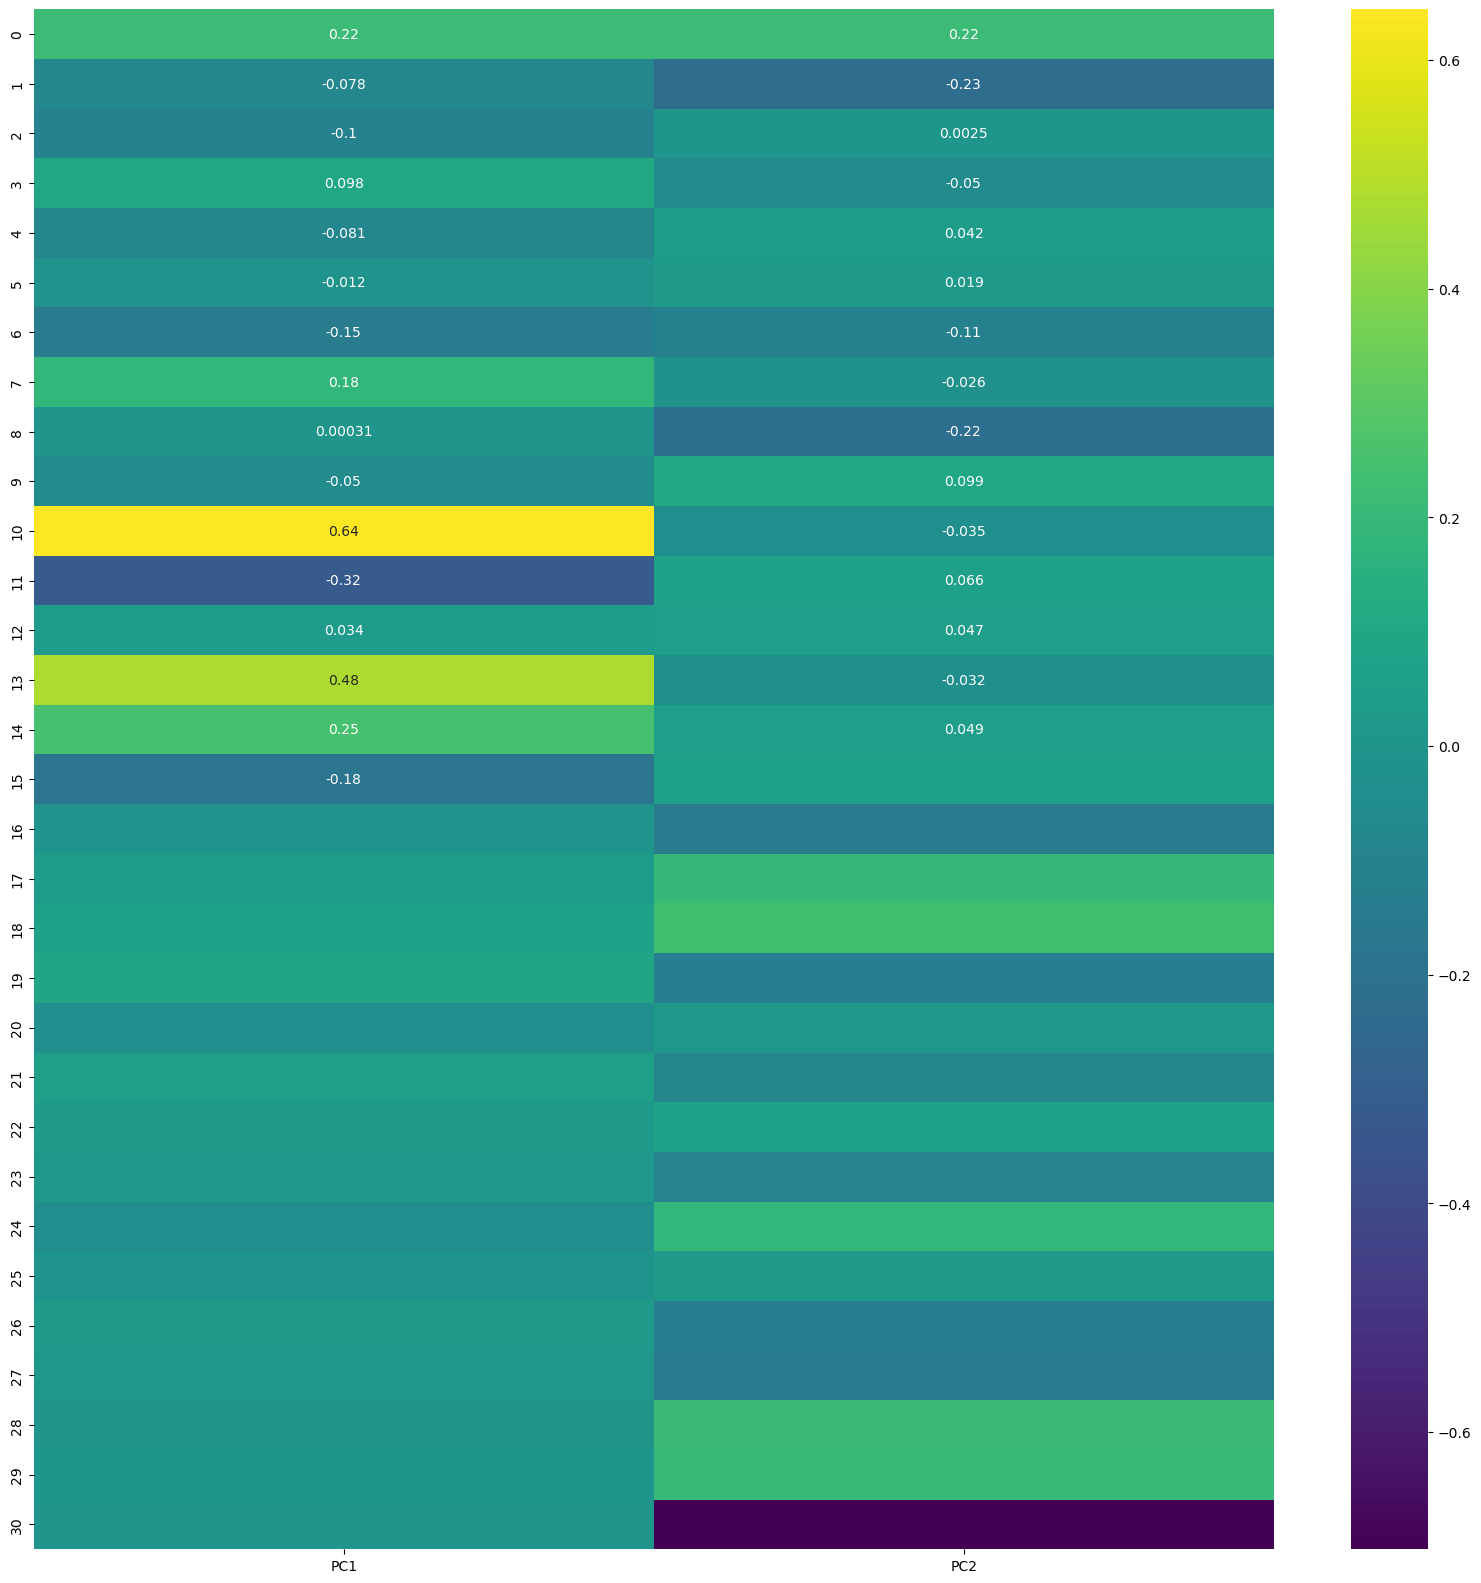

In [18]:
Comp_PCA = pd.DataFrame({'PC1': pca.components_[:, 0], 'PC2': pca.components_[:, 1]})

plt.figure(figsize=(20, 20))

sns.heatmap(Comp_PCA, annot=True, cmap='viridis');

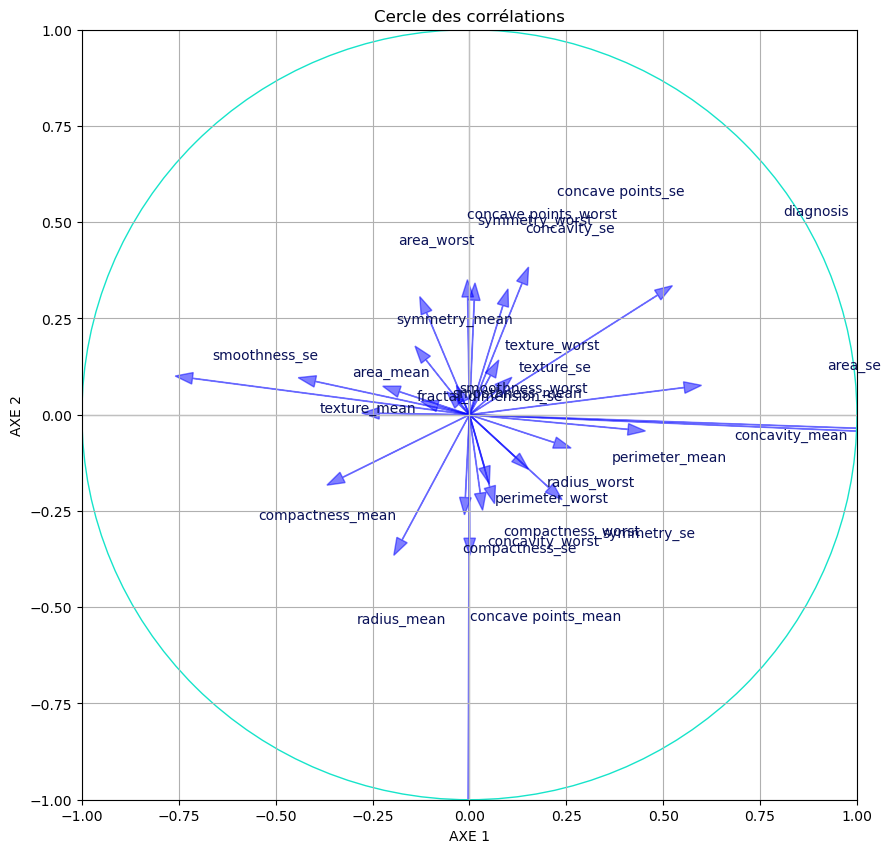

In [21]:

# Racines des valeurs propres
racine_valeurs_propres = np.sqrt(pca.explained_variance_)

# corvar et pca.components_ ont le même nombre de lignes
n_components = len(pca.explained_variance_)
corvar = np.zeros((n_components, n_components))

# Calcul de corvar
for k in range(n_components):
    corvar[:, k] = pca.components_[:, k] * racine_valeurs_propres[k]

# Délimitation de la figure
fig, axes = plt.subplots(figsize=(10, 10))
axes.set_xlim(-1, 1)
axes.set_ylim(-1, 1)

# Affichage des variables
for j in range(n_components):
    plt.annotate(df.columns[j], (corvar[j, 0], corvar[j, 1]), color='#091158')
    plt.arrow(0, 0, corvar[j, 0]*0.6, corvar[j, 1]*0.6, alpha=0.5, head_width=0.03, color='b')

# Ajout des axes
plt.plot([-1, 1], [0, 0], color='silver', linestyle='-', linewidth=1)
plt.plot([0, 0], [-1, 1], color='silver', linestyle='-', linewidth=1)

# Cercle et légendes
cercle = plt.Circle((0, 0), 1, color='#16E4CA', fill=False)
axes.add_artist(cercle)
plt.xlabel('AXE 1')
plt.ylabel('AXE 2')
plt.title('Cercle des corrélations')
plt.grid(True)
plt.show()



Cration nouveau DataFrame PCA_mat contenant les coordonnées des deux premières composantes de l'ACP ainsi que la variable cible.

In [25]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [27]:
# Création d'un nouveau DataFrame PCA_mat
PCA_mat = pd.DataFrame(Coord[:, :2], columns=['PC1', 'PC2'])
PCA_mat['target'] = df['diagnosis'] 

# Affichage des premières lignes de PCA_mat
PCA_mat.head()



,PC1,PC2,target
0,9.225770,2.116196,1
1,2.655802,-3.784776,1
2,5.892492,-1.005579,1
3,7.135401,10.318716,1
4,4.129423,-1.905579,1


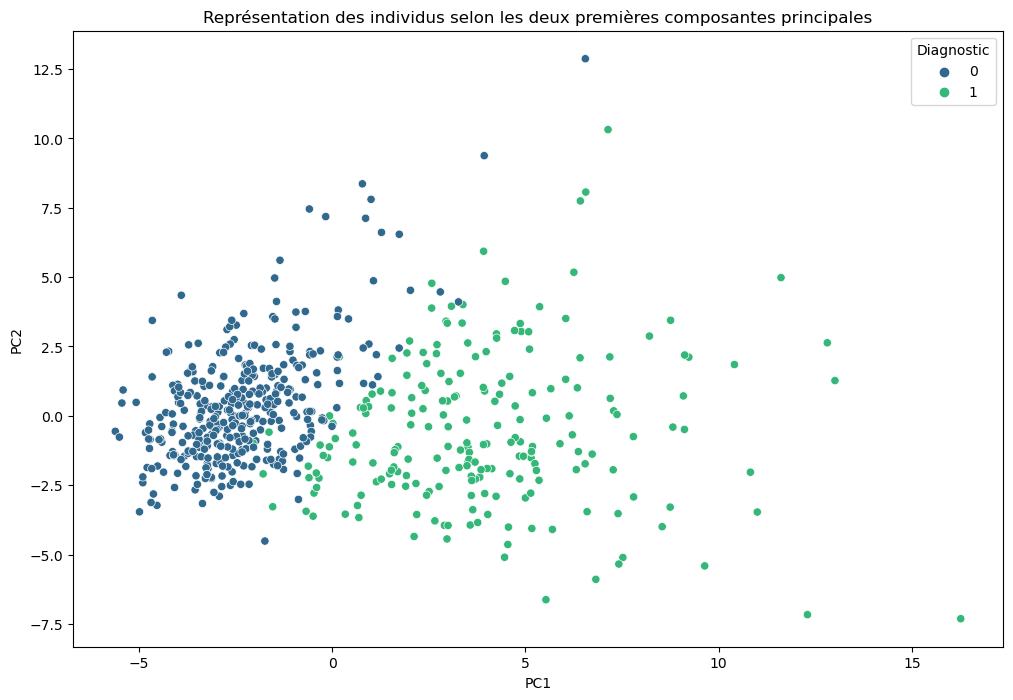

In [31]:
# coordonnées colorées en fonction du diagnostic
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PC1', y='PC2', hue='target', data=PCA_mat, palette='viridis')
plt.title('Représentation des individus selon les deux premières composantes principales')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Diagnostic')
plt.show()